# **Music Recommendation System**

## **Milestone 1**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?

Noted in submitted PDF


## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**. 

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Importing Libraries and the Dataset**

In [3]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [16]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

### **Understanding the data by viewing a few observations**

In [17]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [18]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [19]:
# See the info of the count_df data
print(count_df.isnull().values.any())
count_df.info()

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [20]:
# See the info of the song_df data
print(song_df.isnull().values.any())
song_df.info()

True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**
- The song dataframe has null title and release values 
- Though the song dataframe info says there are no null values for year, we can see in a sample of the data that missing year values are logged as "0", and there seem to be quite a few
- There are no missing values in the count dataframe  

In [21]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = count_df.merge(song_df.drop_duplicates(), how='left', on='song_id')
# Drop the column 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0']) # get rid of redundant column that was likely created from resetting index
df.head(10)
len(df)

2054534

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [22]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder
df['user_id'] = df[['user_id']].apply(LabelEncoder().fit_transform)
df['song_id'] = df[['song_id']].apply(LabelEncoder().fit_transform)
df.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,54961,1239,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
6,54961,1536,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
7,54961,2056,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
8,54961,2220,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
9,54961,3046,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [23]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [24]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [25]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [26]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [27]:
# Drop records with play_count more than(>) 5
df_final = df_final[df_final['play_count'] <= 5]

In [28]:
# Check the shape of the data
df_final.shape

(138301, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [29]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3337

Total number of unique song id

In [30]:
# Display total number of unique song_id
df_final['song_id'].nunique()

620

Total number of unique artists

In [31]:
# Display total number of unique artists
df_final['artist_name'].nunique()

247

#### **Observations and Insights:**
- There are many more users than songs
- This suggests that many users are listening to the same song/songs
- There is about 1 unique artist for every 3 unique songs on average
- This shows that some artists are the creator of multiple of these songs



### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [35]:
# reset index for below function
df_final.reset_index(inplace=True)
df_final.head(10)

,index,user_id,song_id,play_count,title,release,artist_name,year
0,206,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
1,208,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
2,209,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
3,210,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
4,211,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
5,212,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
6,215,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
7,219,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
8,221,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
9,222,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


In [37]:
# get rid of index column
df_final.drop(columns='index', inplace=True)
df_final.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
0,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
1,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
2,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
3,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
4,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
5,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
6,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
7,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
8,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
9,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


In [42]:
#df_final.groupby('song_id').size().sort_values(ascending=False)
songs = {}
for i in range(len(df_final)):
  if df_final['song_id'][i] in songs.keys():
    songs[df_final['song_id'][i]] += df_final['play_count'][i]
  else:
    songs[df_final['song_id'][i]] = df_final['play_count'][i]
#songs

In [52]:
most_interacted = dict(reversed(sorted(songs.items(), key=lambda item: item[1])))
most_interacted

{8582: 3126,
 6293: 2216,
 1286: 1774,
 3567: 1762,
 352: 1752,
 2220: 1692,
 7796: 1660,
 7998: 1592,
 310: 1580,
 5531: 1531,
 4270: 1530,
 4448: 1377,
 4152: 1346,
 1334: 1305,
 1118: 1286,
 8092: 1204,
 7416: 1152,
 8138: 1147,
 6189: 1115,
 9249: 1084,
 7791: 1073,
 703: 1062,
 4639: 1061,
 605: 1057,
 4192: 1044,
 6175: 1032,
 952: 999,
 4284: 991,
 9931: 987,
 2091: 980,
 7103: 971,
 8612: 970,
 6230: 965,
 7911: 957,
 2115: 946,
 6246: 941,
 5367: 928,
 208: 920,
 614: 897,
 317: 897,
 1664: 881,
 5943: 869,
 1348: 863,
 1691: 860,
 9262: 859,
 9019: 859,
 8481: 847,
 2610: 825,
 9186: 818,
 5375: 788,
 4636: 781,
 9162: 780,
 52: 777,
 3074: 772,
 8247: 766,
 3429: 760,
 2672: 758,
 4554: 756,
 5728: 754,
 5272: 748,
 7780: 725,
 7399: 718,
 5291: 709,
 5697: 695,
 1816: 686,
 1281: 686,
 2616: 683,
 154: 681,
 3165: 681,
 7969: 680,
 4727: 671,
 1354: 662,
 8034: 660,
 617: 657,
 396: 656,
 97: 650,
 9139: 649,
 7496: 648,
 7628: 648,
 8654: 641,
 1811: 631,
 3870: 625,
 2210

Most interacted users

In [54]:
df_final.groupby('user_id').size().sort_values(ascending=False)

user_id
61472    282
15733    240
37049    237
9570     204
10763    199
        ... 
17961      1
45476      1
14662      1
14439      1
19776      1
Length: 3337, dtype: int64

#### **Observations and Insights:**
- The most interacted with song was interacted with was 8582 with 3126 interactions
- The least interacted with song was 2342 with 147 interactions
- When grouped by title instead of song_id, the least interacted with song is Did It Again which was interacted with by 47 users
- Did It Again has a duplicate called Did it Again (different capitalization) which contains data about the same exact interactions. This could be dropped
- The highest amount of songs that a user has interacted with is 282 songs from this dataset
- The least amount of songs that a user has interacted with is 1
- This was at first surprising to me as songs with at least 120 interactions and users with at least 90 interactions was a requirement to this dataset
- After reviewing the df_final manipulation code I realized that additional rows were dropped after settings these interaction requirements. 

Songs played in a year

In [55]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,9004
2007,15623
2008,16626
2009,18554
2010,5307


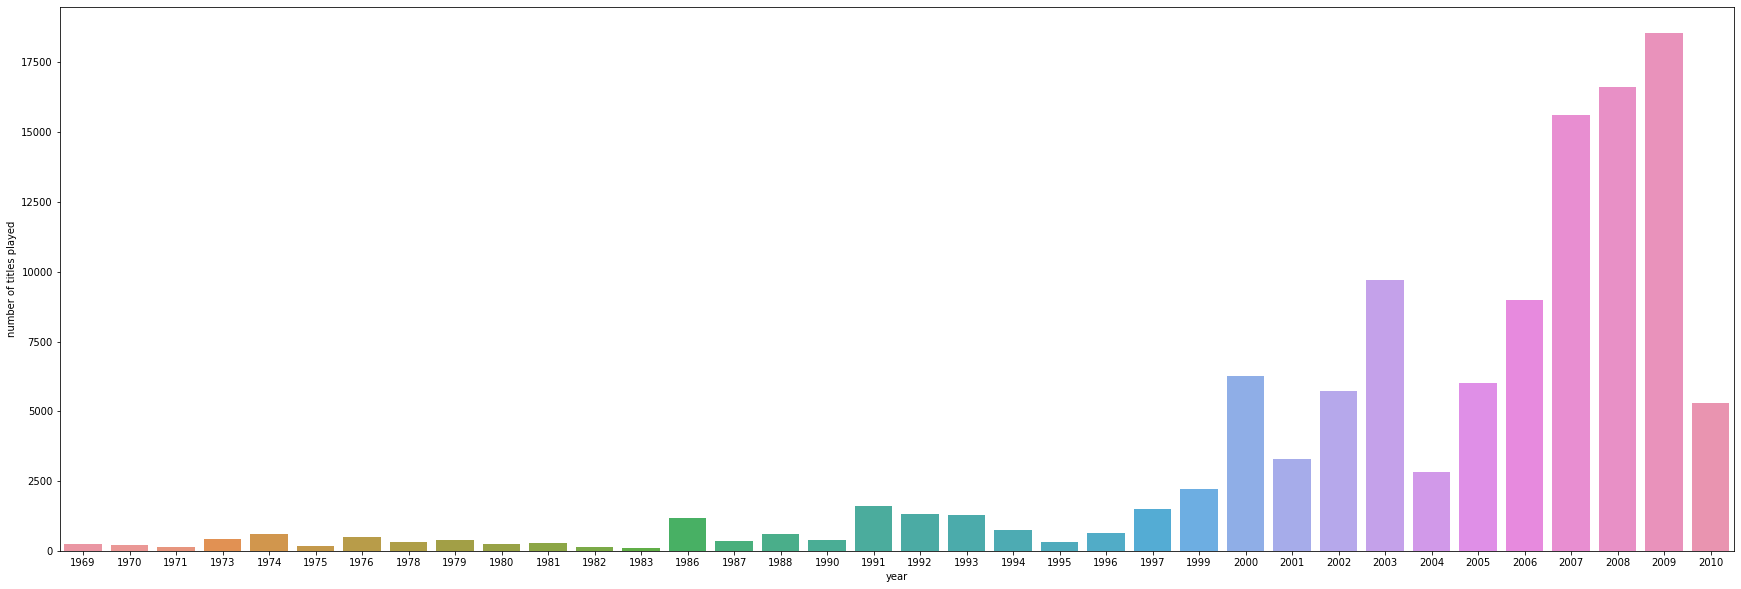

In [ ]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

#### **Observations and Insights:** #
- The distribution of song years gives insight to the age and other demographic factors of the users
- The data only has songs up to 2010, which gives us insight to streaming music at the time
- The majority of songs were from 2009, which doesn't necessarily point to the best year of music but the time which this dataset was taken and the popularity of streaming music at the time
- There is a low, but existent distribution of music before the 2000s



**Think About It:** What other insights can be drawn using exploratory data analysis?
- We could analyze the distribution of how many times a song was played (play_count) to gain insight on usage and song popularity
- We could further explore which specific song and artist names are popular 


## **Proposed approach**
**Potential techniques:** What different techniques should be explored?<br>
**Overall solution design:** What is the potential solution design?<br>
**Measures of success:** What are the key measures of success to compare different potential technqiues?<br>

Noted on submitted PDF.